In [1]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=7
import matplotlib.pyplot as plt
import matplotlib

import pickle

import os
import sys
sys.path.append("..")
from vis_utils.loaders import load_dataset
from vis_utils.plot import plot_scatter


env: CUDA_VISIBLE_DEVICES=7


In [4]:
root_path = "/export/ial-nfs/user/sdamrich/nce_data"
fig_path = "/export/ial-nfs/user/sdamrich/nce_data/figures"

In [5]:
# set up matplotlib
plt.style.use("default")
matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.serif'] = "Times New Roman"
cmap = matplotlib.cm.get_cmap("tab10")

In [6]:
# parameters for all methods
a = 1.0
b = 1.0
seed = 0
k = 15
n_epochs = 500
init_str = "EE"
batch_size = 1024
optimizer = "sgd"
anneal_lr = True
lr_min_factor = 0.0
momentum = 0.0
parametric = False
clamp_low = 1e-10


In [7]:
dataset = "mnist"
x, y, sknn_graph, pca2 = load_dataset(root_path, dataset)

# UMAP

In [8]:
loss_mode = "umap"

nbs_noise = [5, 50, 500, 5000]

embedders = []
for n_noise in nbs_noise:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init_str}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl"
                             )

    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders.append(embedder)
    print(f"done with noise={n_noise}")

done with noise=5
done with noise=50
done with noise=500
done with noise=5000


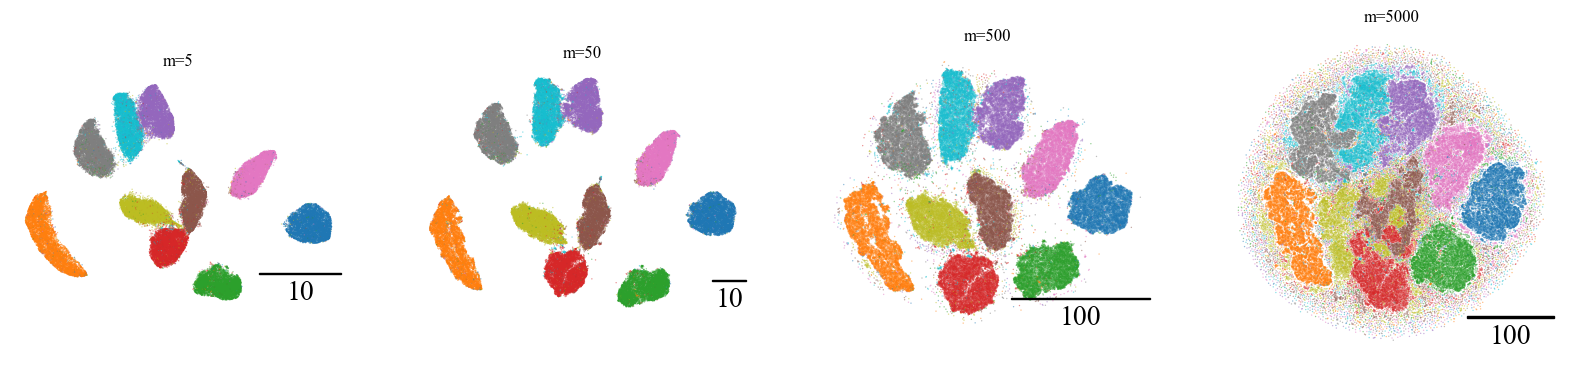

In [9]:
n_rows = 1
n_cols = 4
fig, ax = plt.subplots(n_rows,n_cols, figsize=(20,5))
n_exp = len(embedders)
for i in range(n_exp):
    embd = embedders[i].callback.embds[-1]
    cax = ax[i]
    cax = plot_scatter(cax, embd, y, f"m={nbs_noise[i]}")

# Neg-t-SNE

In [10]:
loss_mode = "neg_sample"

nbs_noise = [5, 50, 500, 5000]

embedders = []
for n_noise in nbs_noise:
    file_name = os.path.join(root_path,
                             dataset,
                             f"cne_{loss_mode}_n_noise_{n_noise}_n_epochs_{n_epochs}_init_{init_str}_bs_{batch_size}"
                             f"_optim_{optimizer}_anneal_lr_{anneal_lr}_lr_min_factor_{lr_min_factor}_momentum_{momentum}_param_{parametric}_clamp_low_{clamp_low}_seed_{seed}.pkl"
                             )

    with open(file_name, "rb") as file:
        embedder = pickle.load(file)

    embedders.append(embedder)
    print(f"done with noise={n_noise}")

done with noise=5
done with noise=50
done with noise=500
done with noise=5000


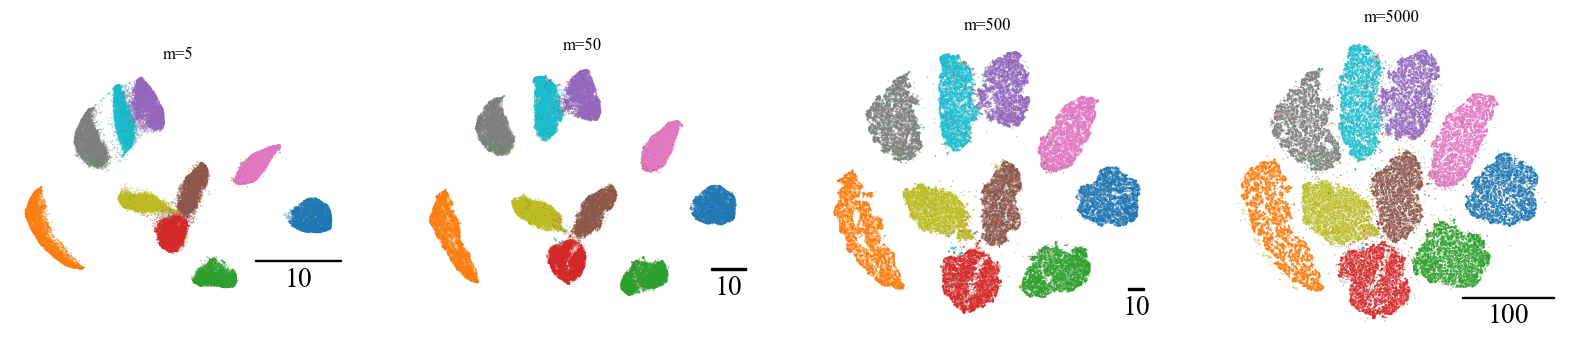

In [11]:
n_rows = 1
n_cols = 4
fig, ax = plt.subplots(n_rows,n_cols, figsize=(20,5))
n_exp = len(embedders)
for i in range(n_exp):
    embd = embedders[i].callback.embds[-1]
    cax = ax[i]
    cax = plot_scatter(cax, embd, y, f"m={nbs_noise[i]}")

In [12]:
for i in range(4):
    plt.figure(figsize=(5,5))
    plot_scatter(plt.gca(), embedders[i].callback.embds[-1], y)
    plt.savefig(os.path.join(fig_path,
                             f"neg_mnist_m_{nbs_noise[i]}.png"),
                bbox_inches='tight',
                pad_inches=0,
                dpi=200)
    plt.close()